In [1]:
import pandas as pd


In [24]:
data_test = pd.read_csv("/content/validation_data.csv")
data_train = pd.read_csv("/content/train_data.csv")


In [30]:
data_train


,SMS,LABEL
0,BOLETO REFERENTE AS PARCELAS EM ATRASO DO CONS...,blocked
1,050003DA0202|lcloud-apple-lnc.com/?iphone=VtBq...,blocked
2,060804CB5F0303|ps: //bancodobrasil.seguranca.gq,blocked
3,Atualizacao ainda nao foi executado em sua con...,blocked
4,0608042BE40303|ps://bancodobrasil.seguranca.cf/,blocked
...,...,...
5995,Host : RB_Bicanga Ip: 170.244.231.14 nao esta ...,ok
5996,Host : RB§Bicanga Ip: 170.244.231.14 nao esta ...,ok
5997,Host : RB§Bicanga Ip: 170.244.231.14 nao esta ...,ok
5998,Host : RB_Bicanga Ip: 170.244.231.14 nao esta ...,ok


In [31]:
data_test

,SMS
0,BB informa:Prezado cliente suas senhas de ACES...
1,BB informa:Prezado cliente suas senhas de ACES...
2,BB informa:Prezado cliente suas senhas de ACES...
3,Node Warning: SFRO01H000001.call.br Warning em...
4,BB informa:Prezado cliente suas senhas de ACES...
...,...
1995,Faça login no aplicativo OlympTrad?: 179.240.1...
1996,Faça login no aplicativo OlympTrad?: 179.240.1...
1997,bitnuvem.com: Identificamos acesso do IP 179.2...
1998,"enterinapplication: 179.240.169.116, BR, For..."


In [133]:
data_train.shape

(6000, 2)

In [134]:
data_test.shape

(2000, 1)

In [34]:
data_train.isnull().sum()

SMS      0
LABEL    0
dtype: int64

In [35]:
data_train.duplicated().sum()

141

In [36]:
data_train.nunique()

SMS      5859
LABEL       2
dtype: int64

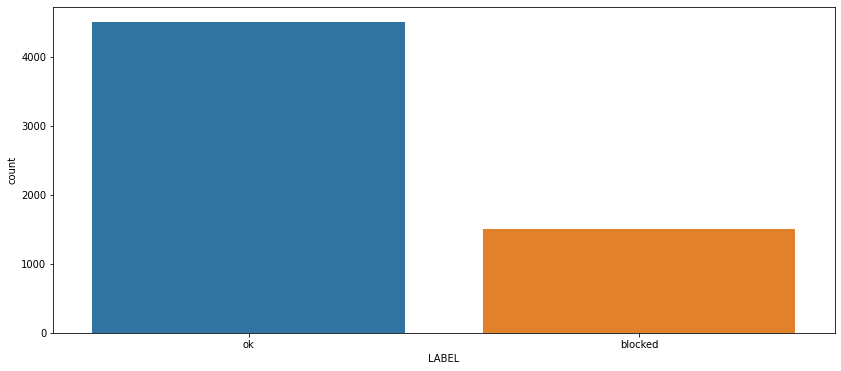

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14,6))
sns.countplot(data=data_train, x='LABEL', 
              order=["ok", "blocked"])

(array([  47.,  205.,  343., 1364., 1390.,  166.,  364.,  417., 1094.,
         610.]),
 array([ 13. ,  29.1,  45.2,  61.3,  77.4,  93.5, 109.6, 125.7, 141.8,
        157.9, 174. ]),
 <a list of 10 Patch objects>)

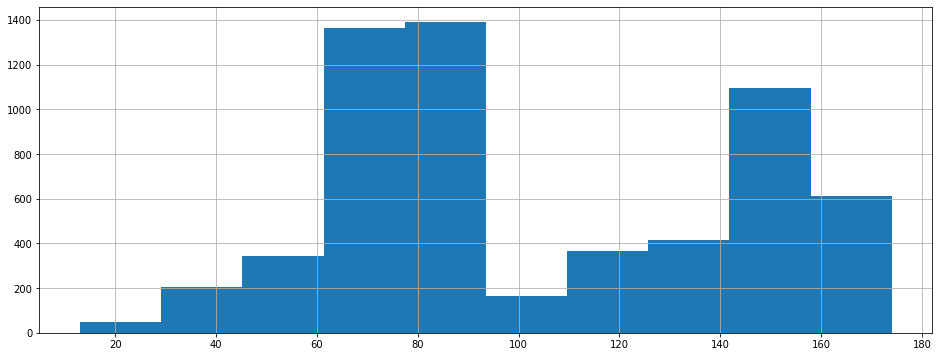

In [41]:
plt.figure(figsize=(16,6))
plt.grid()

plt.hist(data_train['SMS'].str.len())

(array([ 23.,  18.,  51., 166., 253., 658.,  37.,  71., 187.,  36.]),
 array([ 13. ,  28.7,  44.4,  60.1,  75.8,  91.5, 107.2, 122.9, 138.6,
        154.3, 170. ]),
 <a list of 10 Patch objects>)

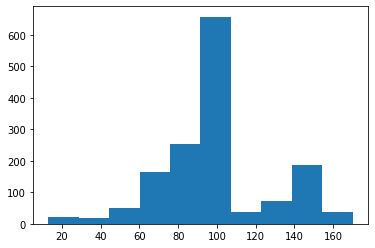

In [47]:
bloqued_data = data_train.query('LABEL == "blocked"')
plt.hist(bloqued_data['SMS'].str.len())

(array([ 23.,  18.,  51., 166., 253., 658.,  37.,  71., 187.,  36.]),
 array([ 13. ,  28.7,  44.4,  60.1,  75.8,  91.5, 107.2, 122.9, 138.6,
        154.3, 170. ]),
 <a list of 10 Patch objects>)

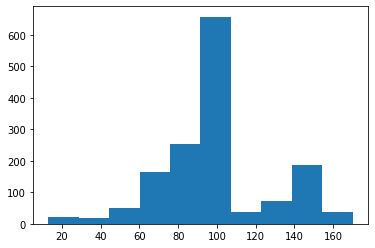

In [48]:
ok_data = data_train.query('LABEL == "blocked"')
plt.hist(ok_data['SMS'].str.len())

In [117]:
# Cleaning the texts
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 6000):
    review = re.sub('[^a-zA-Z]', ' ', data_train['SMS'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('portuguese'))]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [56]:
corpus

['boleto referent parcela atraso con rcio bb vencimento hoje pode haver quebra acordo bonatto adv',
 'lcloud appl lnc iphon vtbqroy',
 'cb f ps bancodobrasil seguranca gq',
 'atualizacao ainda nao executado conta evit bloqueio atual agora acess www avisobbsm',
 'be ps bancodobrasil seguranca cf',
 'appl informa iphon localizado entregu loja agend retirada dispositivo http appl support inc appl inc',
 'appl inc mobil appl localizado s http icloud us i bid id',
 'r pido seguro acess http bancodobrasil seguranca gq start',
 'dispositivo imei cor black modelo gb localizado proximo bangu acess http myidd check veja localizacao',
 'c bloqueio agora acess http bancodobrasil acessoseguro gq',
 'appl inc your lost uuuu ha been locat today at pm view last locat http lcloud co iphon gki gvb',
 'suport appl notamo estar tendo dificuldad acesso agendamento favor acessar http appl support inc appl appl inc br',
 'appl suport iphon s plu gb modo perdido localizado acess site visual http iphonelocaliz

In [120]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 2000)
X = cv.fit_transform(corpus).toarray()
y = data_train.iloc[:, 1:2].values

In [125]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [128]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [129]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [130]:
cm

array([[284,   1],
       [ 11, 904]])

In [131]:
TP = cm[1][1] #true positive
TN = cm[0][0] #true negative
FP = cm[0][1] #false positive
FN = cm[1][0] #false negative

In [132]:
Accuracy = (TP + TN) / (TP + TN + FP + FN)
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)
Score = 2 * Precision * Recall / (Precision + Recall)
print('Accuracy: ' + str(Accuracy))
print('Precision: ' + str(Precision))
print('Recall: ' + str(Recall))
print('Score: ' + str(Score))



Accuracy: 0.99
Precision: 0.9988950276243094
Recall: 0.9879781420765027
Score: 0.9934065934065933


Usando o mesmo método para classificar os dados do arquivo validation_data.csv

In [187]:
frames = [data_train['SMS'], data_test['SMS']]
X = pd.concat(frames)

1    050003DA0202|lcloud-apple-lnc.com/?iphone=VtBq...
1    BB informa:Prezado cliente suas senhas de ACES...
Name: SMS, dtype: object

In [202]:
# Cleaning the texts
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 6000):
    review = re.sub('[^a-zA-Z]', ' ', str(X[i]))
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('portuguese'))]
    review = ' '.join(review)
    corpus.append(review)
X_test = cv.fit_transform(corpus).toarray()
for i in range(0, 2000):
    review = re.sub('[^a-zA-Z]', ' ',data_test['SMS'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('portuguese'))]
    review = ' '.join(review)
    corpus.append(review)
X = cv.fit_transform(corpus).toarray()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [210]:
X_train = X[0:6000]
y_train = y
X_test = X[6000:8000]

In [212]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [213]:
y_pred

array(['blocked', 'blocked', 'blocked', ..., 'ok', 'ok', 'ok'],
      dtype='<U7')